In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
df = pd.read_csv("overfitting_example.csv")
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [3]:
#setting target and predictor variables
y = df['Final_Grade']
X = df.drop(columns = ['Final_Grade'])

In [7]:
# 1. Number of features
num_features = len(X.columns)
print("Number of features: ",num_features)

Number of features:  41


In [6]:
#Performing a Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Fitting a Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
#Training Error
pred_train = model.predict(X_train)
MSE_train = np.mean((pred_train - y_train)**2)
print("Training Error: ", MSE_train)

# 2. Testing Error
pred_test = model.predict(X_test)
MSE_test = np.mean((pred_test - y_test)**2)
print("Testing Error: ", MSE_test)

Training Error:  2.6268841802196254
Testing Error:  4.987346573982337


In [10]:
#Calculating the regression coefficients
predictors = X.columns
coef = pd.Series(model.coef_,predictors).sort_values()

In [11]:
coef

reason_home         -0.772027
activities_yes      -0.546699
romantic_yes        -0.364564
failures            -0.251957
nursery_yes         -0.242450
Dalc                -0.196888
famsize_LE3         -0.196355
Fjob_teacher        -0.165170
Fedu                -0.156270
Mjob_health         -0.129634
Pstatus_T           -0.116138
age                 -0.092240
studytime           -0.084620
internet_yes        -0.081433
guardian_other      -0.061500
Fjob_services       -0.059503
Medu                -0.046828
Mjob_other          -0.042762
freetime            -0.017326
reason_reputation    0.042760
absences             0.048037
health               0.052846
Walc                 0.097391
Mjob_services        0.102704
address_U            0.137309
school_MS            0.155010
traveltime           0.156933
goout                0.163795
paid_yes             0.191553
famsup_yes           0.199320
guardian_mother      0.207821
G1                   0.245038
sex_M                0.249834
Fjob_other

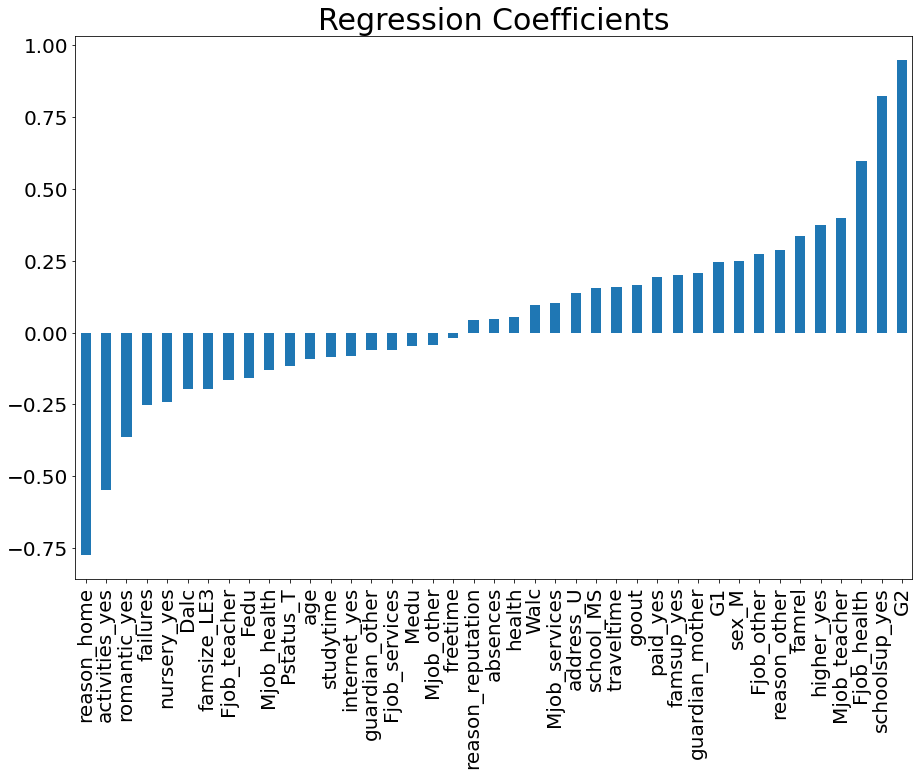

In [12]:
# 3. Plotting the Coefficients
plt.figure(figsize = (15,10))
coef.plot(kind='bar', fontsize = 20)
plt.title ("Regression Coefficients", fontsize = 30)
plt.show()



## Next lesson 

In [14]:
data, y, coefficients = datasets.make_regression(n_samples = 100, n_features = 2, coef = True, random_state = 23)
x1 = data[:,0]
x2 = data[:,1]


In [17]:
print(coefficients)

[77.30856619 18.87896326]


In [18]:

rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['legend.fontsize'] = 16
rcParams['figure.titlesize'] = 1

def loss_function(b1,b2,y,x1,x2):
    error = y - b1*x1 - b2*x2
    loss = np.mean(error**2)
    return loss

def plot_loss_function(b1,b2,y,x1,x2):
    loss = np.asarray([[loss_function(i,j,y,x1,x2) for i in b1] for j in b2])
    fig, ax = plt.subplots(figsize = (10,10))
    CS = ax.contour(b1, b2, loss, levels = [0,10, 100, 500, 1000, 3000, 5000, 8000], colors='k')
    ax.clabel(CS, fontsize=9,fmt='%1.1f', inline=True)
    ax.set_title('Loss function without Regularization')
    plt.plot([0,0,0,0,0], [-150,0,10,50,150], color = 'grey', linestyle = 'dashed')
    plt.plot([-150,0,10,50,150],[0,0,0,0,0], color = 'grey', linestyle = 'dashed')
    plt.xlim(-50,150)
    plt.ylim(-50,150)
    plt.xlabel('b1')
    plt.ylabel('b2')
    return CS

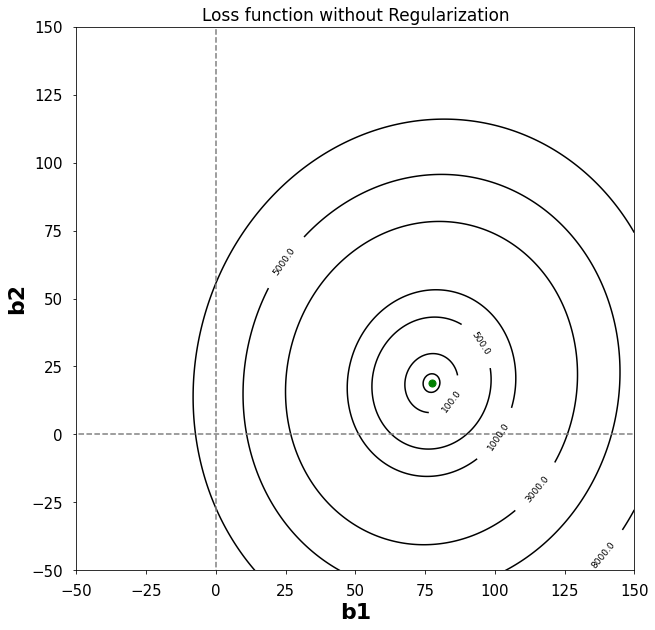

In [23]:
b1 = np.linspace(-150, 150, 501)
b2 = np.linspace(-150, 150, 501)
contour_plot = plot_loss_function(b1,b2,y,x1,x2)

# Plot the best fit
best_fit_b1 = coefficients[0]
best_fit_b2 = coefficients[1]
plt.scatter(best_fit_b1, best_fit_b2, s = 50, color = 'green')